In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

sample_submission.csv
test.csv
train.csv



In [2]:
data = pd.read_csv('../input/train.csv')
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


Because values of -1 indicate that the feature was missing from the observation. Values of '-1' is replaced by NaN such that we can use the "Missingno" package which is a most useful and convenient tool in visualising missing values in the dataset.

In [3]:
data_copy = data
data_copy = data_copy.replace(-1,np.NaN)

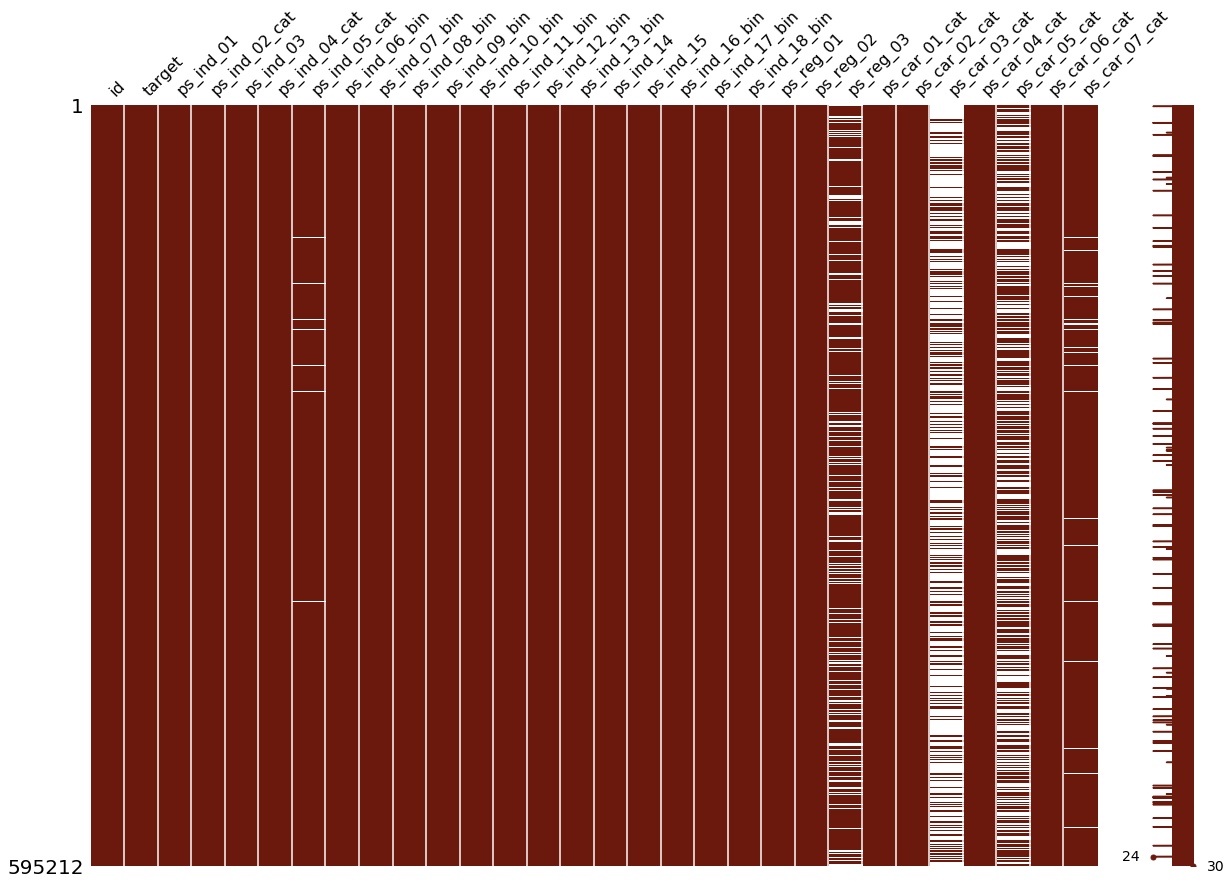

In [4]:
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=data_copy.iloc[:,:30], figsize=(20, 14), color=(0.42, 0.1, 0.05))

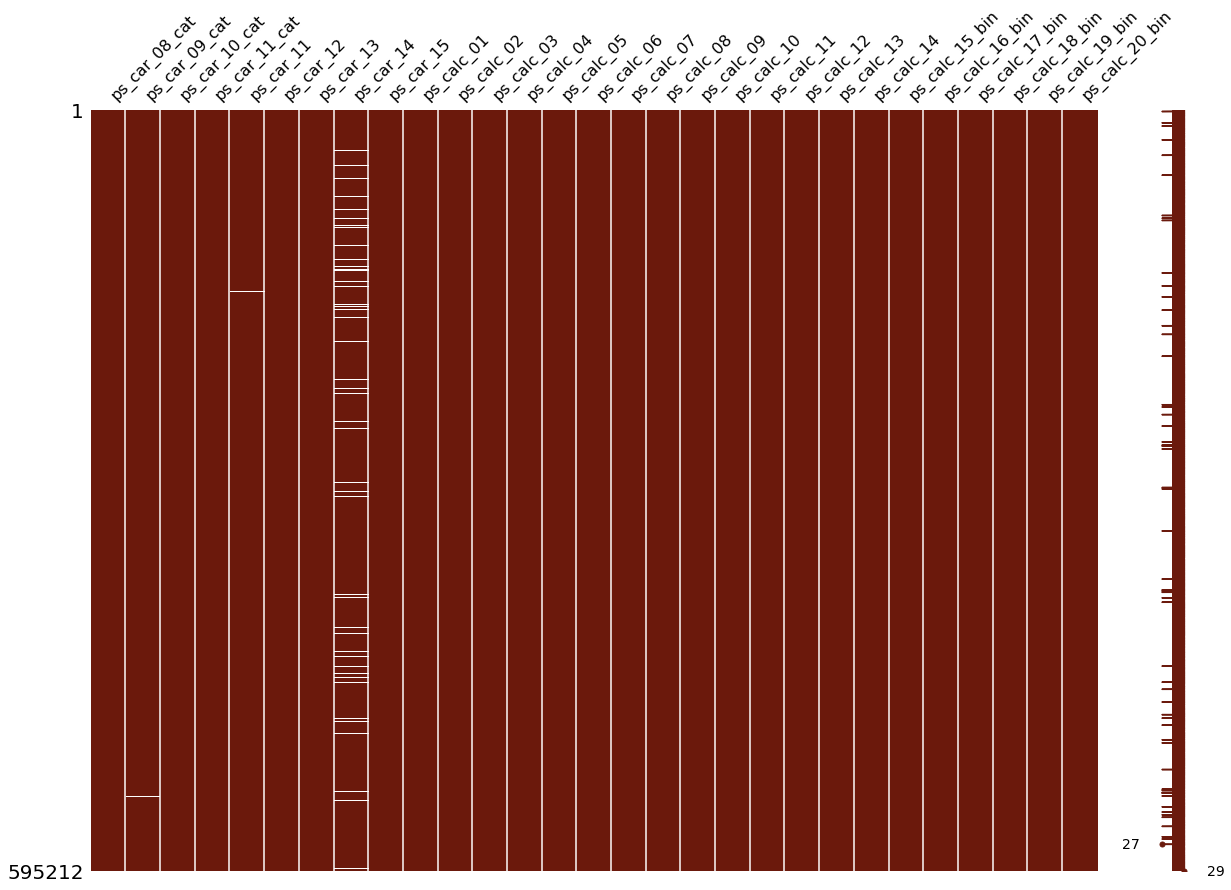

In [5]:
msno.matrix(df=data_copy.iloc[:,30:], figsize=(20, 14), color=(0.42, 0.1, 0.05))

As we can see in the two figures above, there are 8 features that contains missing values : 'ps_ind_05_cat', 'ps_reg_03', 'ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat', 'ps_car_11', 'ps_car_14'. Especially,  'ps_reg_03', 'ps_car_03_cat', 'ps_car_05_cat' and 'ps_car_14' have many missing values to be handled.